In [1]:
from PIL import Image, ImageOps, ImageDraw
from typing import Literal



def display_image(img: Image.Image, scale: float = 10) -> None:
    display(ImageOps.scale(img, scale, Image.Resampling.NEAREST))

def snap(val: float, mult: float) -> float:
    return mult * round(val / mult)

def create_symmetric_base(
        size: tuple[int, int],
        lines: list[tuple[tuple[float]]],
        fill: int = 0,
        **kwargs,
    ) -> Image.Image:
    
    img = Image.new("L", size, 255)
    draw = ImageDraw.Draw(img)
    
    for line in lines:
        draw.line(line, fill=fill)
    
    img.paste(ImageOps.flip(img), mask=img)
    img.paste(ImageOps.mirror(img), mask=img)
    
    return img

def create_mask_from_base(
        base: Image.Image,
        **kwargs,
    ) -> Image.Image:
    
    mask = base.copy()
    width, height = mask.size
    
    ImageDraw.floodfill(mask, (width / 2, height / 2), 0)
    mask = ImageOps.invert(mask)
    
    return mask

def create_tile_template(
        base: Image.Image,
        mask: Image.Image,
        **kwargs,
    ) -> Image.Image:
    
    tile = base.copy()
    tile.putalpha(mask)
    
    return tile

In [8]:
SCALE = 4

In [ ]:
def create_square_base(size: int, **kwargs) -> tuple[Image.Image]:
    lines = [((0, size-1), (0, 0)), ((0, 0), (size-1, 0))]
    return create_symmetric_base((size, size), lines, **kwargs)

for size in [8, 12, 16, 24, 32, 48, 64]:
    base = create_square_base(size)
    display_image(base, SCALE)

![](iso_order.png)

In [ ]:
def create_isometric_base(size: int, **kwargs) -> tuple[Image.Image]:
    assert size % 2 == 0, "Size must be even numbered"
    
    lines = [((0, size/2-1), (size-1, 0))]
    return create_symmetric_base((size*2, size), lines, **kwargs)

for size in [8, 12, 16, 24, 32, 48, 64]:
    base = create_isometric_base(size)
    display_image(base, SCALE)

![](hex_flat_order.png)
![](hex_point_order.png)

height/width=1.0000
base.size=(12, 12)


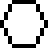

width/height=0.8571
base.size=(12, 14)


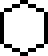

height/width=0.8571
base.size=(14, 12)


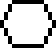

width/height=0.8750
base.size=(14, 16)


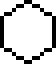

height/width=0.7500
base.size=(16, 12)


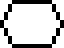

width/height=0.8889
base.size=(16, 18)


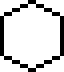

height/width=0.8889
base.size=(18, 16)


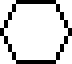

width/height=0.9000
base.size=(18, 20)


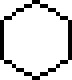

height/width=0.8000
base.size=(20, 16)


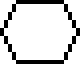

width/height=0.8333
base.size=(20, 24)


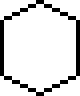

height/width=0.9091
base.size=(22, 20)


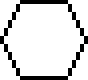

width/height=0.8462
base.size=(22, 26)


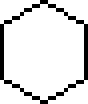

height/width=0.8333
base.size=(24, 20)


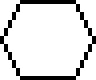

width/height=0.8571
base.size=(24, 28)


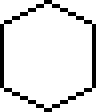

height/width=0.9231
base.size=(26, 24)


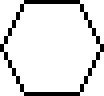

width/height=0.8667
base.size=(26, 30)


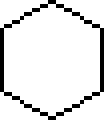

height/width=0.8571
base.size=(28, 24)


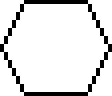

width/height=0.8750
base.size=(28, 32)


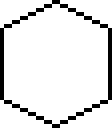

height/width=0.8000
base.size=(30, 24)


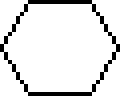

width/height=0.8824
base.size=(30, 34)


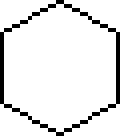

height/width=0.8750
base.size=(32, 28)


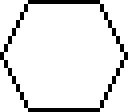

width/height=0.8889
base.size=(32, 36)


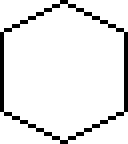

height/width=0.8235
base.size=(34, 28)


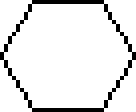

width/height=0.8500
base.size=(34, 40)


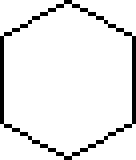

height/width=0.8889
base.size=(36, 32)


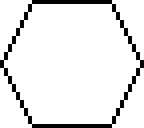

width/height=0.8571
base.size=(36, 42)


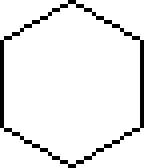

height/width=0.8421
base.size=(38, 32)


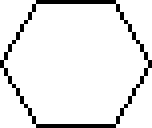

width/height=0.8636
base.size=(38, 44)


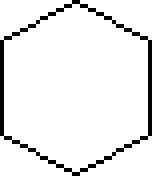

height/width=0.9000
base.size=(40, 36)


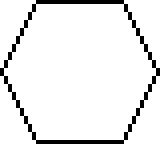

width/height=0.8696
base.size=(40, 46)


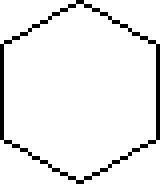

height/width=0.8571
base.size=(42, 36)


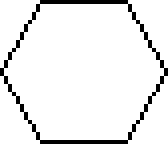

width/height=0.8750
base.size=(42, 48)


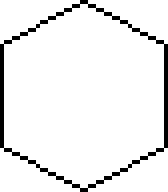

height/width=0.9091
base.size=(44, 40)


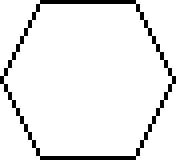

width/height=0.8800
base.size=(44, 50)


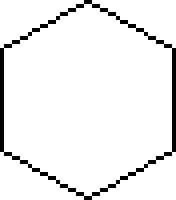

height/width=0.8696
base.size=(46, 40)


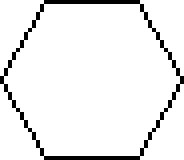

width/height=0.8519
base.size=(46, 54)


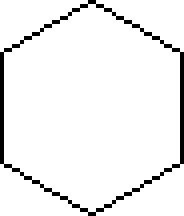

height/width=0.8333
base.size=(48, 40)


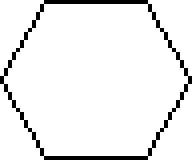

width/height=0.8571
base.size=(48, 56)


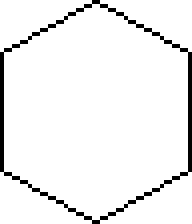

In [14]:
def create_hexagonal_base(
        size: int,
        top: Literal["flat", "point"] = "flat",
        **kwargs,
    ) -> Image.Image:
    assert size % 2 == 0, "Size must be even numbered"
    
    SQRT3BY2 = 0.866
    
    match top:
        case "flat":
            width, height = size, int(snap(size*SQRT3BY2, 4)) # nearest multiple of 4
            qw, mh = width / 3.9, height / 2
            
            offset = 0
            if width in (8, 12): offset = 0.5
            
            lines = [
                ((0, mh-1), (qw-0.5+offset, 0)), # top-left
                ((qw+0.5, 0), (width/2, 0)), # top
            ]
            
            print(f"{height/width=:.4f}")
        
        case "point":
            # assert size % 4 == 0, "Size must be multiple of 4"
            
            width, height = size, int(snap(size/SQRT3BY2, 2)) # nearest multiple of 2
            mw, qh = width / 2, height / 3.9
            
            offset = 0
            if width in (10, 14, 18): offset = 0.5
            
            lines = [
                ((0, qh-0.5+offset), (mw-0.5, 0)), # top-left
                ((0, qh+0.5), (0, height/2)), # side
            ]
            
            print(f"{width/height=:.4f}")
    
    base = create_symmetric_base((width, height), lines, **kwargs)
    
    print(f"{base.size=}")
    
    return base


for s in range(12, 50, 2):
    display_image(create_hexagonal_base(s, "flat"), SCALE)
    display_image(create_hexagonal_base(s, "point"), SCALE)